<a href="https://colab.research.google.com/github/DRepresser/NeuroClassify/blob/main/preprocess_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [4]:
positive_file_path = "/content/drive/MyDrive/ESM/data_clean/positive_sequences.csv"
negative_file_path = "/content/drive/MyDrive/ESM/data_clean/negative_sequences.csv"

In [5]:
positive_df = pd.read_csv(positive_file_path)
positive_df['label'] = 1
positive_df

,sequence,label
0,IGLRLPNMLKF,1
1,LRSPKMMHKSGCFGRRLDRIGSLSGLGCNVLRKY,1
2,SADYLDVSQ,1
3,HPVVQSAEMSFGRPVVVEEEQALNPEELSFSEQAYLSHDAAGFGYP...,1
4,GLYSSERTEEEVEISHGMHHRE,1
...,...,...
3063290,GYKDKEKEEKVNICKLYRGLPII,1
3063291,AYSTTT,1
3063292,YRAYSTTT,1
3063293,SWYRAPPRGRRYRAYSTTT,1


In [6]:
negative_df = pd.read_csv(negative_file_path)
negative_df['label'] = 0
negative_df

,sequence,label
0,MSGSVCCACDTRFFRAQWVDCGFGGSSSVVVGASPQGLLRVR,0
1,RTQPTSAARPCRRVERD,0
2,APMMIRFVDDCPGIRD,0
3,MSEVAEKVKKIVVEHLGVDEAKVTPEASFIDDLGADSLDTVELVMA...,0
4,QAAQFKVWSASELVD,0
...,...,...
11140486,CDTVSVAKFC,0
11140487,AFCSECGEQVCRNKHIDGKCDTVSVAKFC,0
11140488,NTFMYYAPNNRVVFIEEFILI,0
11140489,GGLVCKNTFMYYAPNNRVVFIEEFILI,0


In [7]:
df = pd.concat([positive_df, negative_df], ignore_index=True)
df['length'] = df['sequence'].apply(len)
df = df[df['length'] <= 128]
df

,sequence,label,length
0,IGLRLPNMLKF,1,11
1,LRSPKMMHKSGCFGRRLDRIGSLSGLGCNVLRKY,1,34
2,SADYLDVSQ,1,9
3,HPVVQSAEMSFGRPVVVEEEQALNPEELSFSEQAYLSHDAAGFGYP...,1,85
4,GLYSSERTEEEVEISHGMHHRE,1,22
...,...,...,...
14203781,CDTVSVAKFC,0,10
14203782,AFCSECGEQVCRNKHIDGKCDTVSVAKFC,0,29
14203783,NTFMYYAPNNRVVFIEEFILI,0,21
14203784,GGLVCKNTFMYYAPNNRVVFIEEFILI,0,27


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14195499 entries, 0 to 14203785
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   sequence  object
 1   label     int64 
 2   length    int64 
dtypes: int64(2), object(1)
memory usage: 433.2+ MB


In [9]:
df.describe()

,label,length
count,1.419550e+07,1.419550e+07
mean,2.152096e-01,2.226255e+01
std,4.109677e-01,9.925223e+00
min,0.000000e+00,2.000000e+00
25%,0.000000e+00,1.400000e+01
50%,0.000000e+00,2.200000e+01
75%,0.000000e+00,3.100000e+01
max,1.000000e+00,1.280000e+02


In [10]:
def downsample_classes(df, target_size=100000):
    """
    Downsample both positive and negative classes to a target size.

    Parameters:
        df (pd.DataFrame): The input dataframe containing the data.
        target_size (int): The number of samples to downsample each class to.

    Returns:
        pd.DataFrame: A new dataframe with both classes downsampled to the target size.
    """
    positive_samples = df[df['label'] == 1]
    negative_samples = df[df['label'] == 0]

    positive_samples_downsampled = positive_samples.sample(n=target_size, random_state=42)
    negative_samples_downsampled = negative_samples.sample(n=target_size, random_state=42)

    downsampled_df = pd.concat([positive_samples_downsampled, negative_samples_downsampled]).sample(frac=1, random_state=42).reset_index(drop=True)

    return downsampled_df

In [11]:
downsampled_df = downsample_classes(df)
downsampled_df

,sequence,label,length
0,QINNLILNPCTRLRAILLYVGGSILPG,0,27
1,KHHTLLHNPPRA,1,12
2,ELHVGPALELG,0,11
3,TPPLYNTPTVQHPDYTTTPTDNTP,1,24
4,AGPDMLYLMEFFRVQLTVTPLLGMVFVPKVTILFE,1,35
...,...,...,...
199995,SKEERE,0,6
199996,GVPELSYSFNDERQYVMPIAPPAHWTG,0,27
199997,TGTVRKLWTQSQAYIEYGRLRLRLEAPM,0,28
199998,QWIDHELDVSSQPRSDRARTSQRLCDVLSTSSYPV,0,35


In [12]:
output_path = "/content/drive/MyDrive/ESM/data_clean/"
downsampled_df.to_csv(output_path + "downsampled_and_concat.csv", index=False)

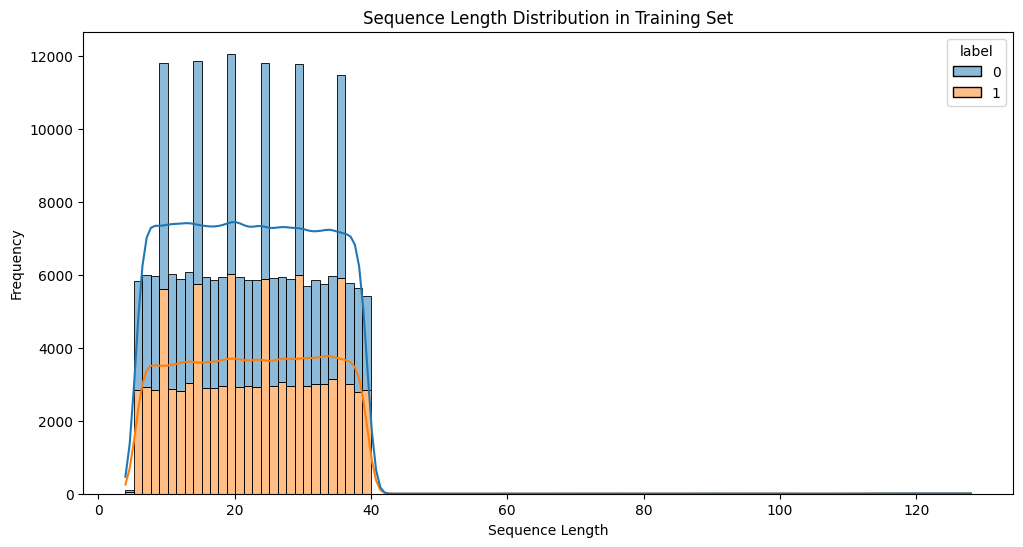

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=downsampled_df, x='length', hue='label', kde=True, bins=100, multiple='stack')
plt.title("Sequence Length Distribution in Training Set")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

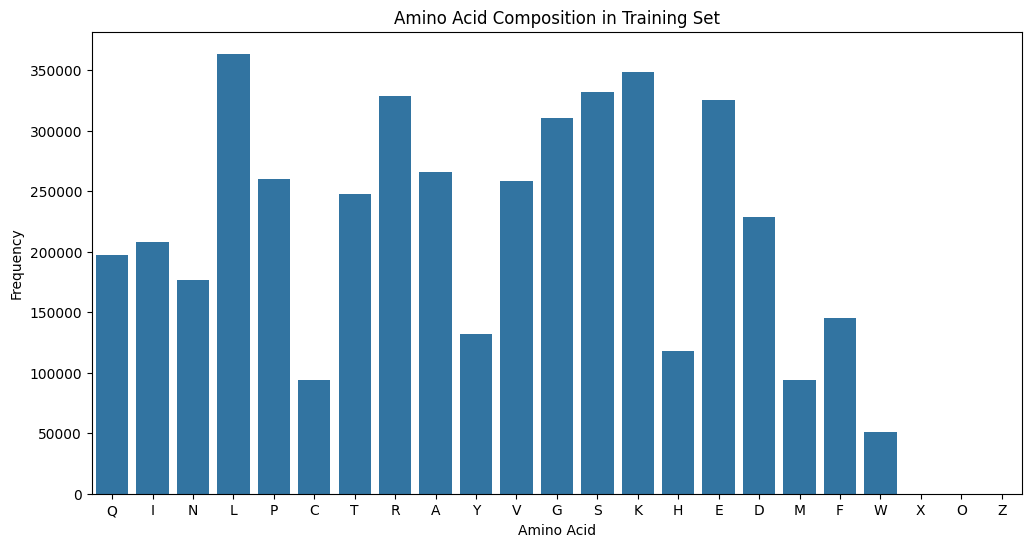

In [14]:
all_sequences = ''.join(downsampled_df['sequence'])
aa_counts = Counter(all_sequences)

aa_df = pd.DataFrame(list(aa_counts.items()), columns=['Amino Acid', 'Count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Amino Acid', y='Count', data=aa_df)
plt.title("Amino Acid Composition in Training Set")
plt.xlabel("Amino Acid")
plt.ylabel("Frequency")
plt.show()